# AI-Bioinnovate Hackathon

Protein Engineering

PE4 - Identify features that significantly contribute to classification accuracy by applying various
feature selection methods and eventually building a stacked ensemble method.

1. The given dataset is a feature vector of blood brain barrier penetrating peptides. Class ‘1’
are blood brain barrier penetrating peptides; 0 are non-b3p2.

2. It has different types of features. The final dataset has feature size greater than sample
size. Provided training dataset (b3p2_training) and independent dataset
(b3p2_fusion_independent)

Team Name: nithinrosarieo24

Team Member: Nithin Rosarieo

# Importing libraries

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,StackingClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Dataset

In [2]:
data = pd.read_csv("b3p2_training.csv")
data.head()

,Unnamed: 0.2,A,C,D,E,F,G,H,I,K,...,T5_1014,T5_1015,T5_1016,T5_1017,T5_1018,T5_1019,T5_1020,T5_1021,T5_1022,T5_1023
0,0,0.090909,0.045455,0.045455,0.090909,0.045455,0.045455,0.045455,0.136364,0.045455,...,0.051096,0.021400,0.080314,-0.177617,-0.006289,0.022733,0.021161,0.098242,0.040609,-0.147906
1,1,0.052632,0.157895,0.000000,0.157895,0.000000,0.000000,0.000000,0.000000,0.105263,...,-0.036932,0.006353,0.146852,-0.159401,0.059049,-0.043450,-0.022912,-0.004734,-0.027946,-0.058961
2,2,0.181818,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,...,-0.030080,0.041508,0.034924,-0.238754,-0.005690,0.005093,-0.026368,0.120563,-0.060653,-0.080959
3,3,0.200000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.113665,0.100891,0.116028,-0.141084,-0.078798,-0.060434,-0.067135,0.057731,-0.015811,0.016214
4,4,0.125000,0.000000,0.125000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,...,0.050141,0.023073,0.073708,-0.109007,0.036272,-0.059026,0.025007,0.066803,-0.037245,-0.044473


In [3]:
data.shape

(652, 2104)

In [4]:
data_type = data.dtypes
data_type.value_counts()

int64      1055
float64    1049
Name: count, dtype: int64

In [5]:
data.describe()

,Unnamed: 0.2,A,C,D,E,F,G,H,I,K,...,T5_1014,T5_1015,T5_1016,T5_1017,T5_1018,T5_1019,T5_1020,T5_1021,T5_1022,T5_1023
count,652.00000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,...,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,325.50000,0.071996,0.055913,0.065956,0.042394,0.035884,0.023964,0.072161,0.055777,0.073682,...,0.004260,0.015930,0.062904,-0.155691,0.021876,-0.042451,-0.005146,0.095759,-0.022878,-0.016154
std,188.36047,0.070039,0.076372,0.085046,0.061750,0.059830,0.052125,0.080758,0.092386,0.089915,...,0.065269,0.081645,0.066383,0.063601,0.084564,0.083322,0.073175,0.059958,0.052937,0.062839
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.227077,-0.237900,-0.152292,-0.332630,-0.248385,-0.286813,-0.249478,-0.123504,-0.254070,-0.244037
25%,162.75000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.035983,-0.039160,0.023522,-0.195895,-0.034175,-0.089393,-0.050464,0.052879,-0.052939,-0.058641
50%,325.50000,0.062500,0.000000,0.040000,0.000000,0.000000,0.000000,0.055556,0.000000,0.051957,...,0.009935,0.010242,0.064395,-0.149638,0.016798,-0.046186,-0.001659,0.092188,-0.021381,-0.014402
75%,488.25000,0.111111,0.100000,0.111111,0.076923,0.059743,0.024543,0.118235,0.087276,0.125000,...,0.050142,0.061850,0.101159,-0.110866,0.076670,0.010016,0.042375,0.131172,0.009967,0.017701
max,651.00000,0.400000,0.583333,0.500000,0.428571,0.500000,0.400000,0.500000,0.600000,0.500000,...,0.174185,0.357194,0.319909,0.065255,0.278880,0.260315,0.181149,0.276495,0.114756,0.170871


In [6]:
data.isnull().sum()

Unnamed: 0.2    0
A               0
C               0
D               0
E               0
               ..
T5_1019         0
T5_1020         0
T5_1021         0
T5_1022         0
T5_1023         0
Length: 2104, dtype: int64

In [7]:
null_values = data.isnull().sum().sum()
null_values

0

# Features and Targets

In [8]:
x = data.drop('class', axis=1)
y = data['class']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
x_train.shape, y_train.shape

((521, 2103), (521,))

In [11]:
x_test.shape, y_test.shape

((131, 2103), (131,))

# Feature selection

In [12]:
selector = SelectKBest(f_classif,k=10) 
x_train_selected = selector.fit_transform(x_train,y_train)
x_test_selected = selector.transform(x_test)

In [13]:
pd.DataFrame(x_train_selected)

,0,1,2,3,4,5,6,7,8,9
0,29.0,0.000000,0.000000,3.0,-0.82,-0.090173,-0.005906,0.031811,0.071928,-0.096772
1,305.0,0.142857,0.000000,3.0,1.90,-0.177729,0.079486,0.117459,-0.010153,-0.236596
2,364.0,0.100000,0.100000,1.0,1.58,-0.196545,0.039728,0.140164,-0.077477,-0.145760
3,199.0,0.000000,0.083333,3.0,6.61,-0.038399,-0.025432,0.151336,-0.117013,-0.150181
4,511.0,0.025000,0.075000,1.0,8.01,-0.136882,0.017619,0.147719,-0.057221,-0.108904
...,...,...,...,...,...,...,...,...,...,...
516,71.0,0.000000,0.000000,3.0,0.08,-0.018889,0.005334,0.238188,-0.085240,-0.181804
517,106.0,0.000000,0.000000,3.0,0.70,0.047989,-0.008454,0.079396,-0.019527,-0.000624
518,270.0,0.000000,0.071429,3.0,-2.09,-0.172759,-0.030130,0.079047,-0.060414,-0.131167
519,435.0,0.083333,0.000000,1.0,3.13,-0.077333,0.138682,0.100986,0.006238,-0.092122


In [14]:
pd.DataFrame(x_test_selected)

,0,1,2,3,4,5,6,7,8,9
0,639.0,0.300000,0.000000,1.0,-2.65,-0.060396,0.052385,0.067502,-0.061898,-0.129577
1,265.0,0.000000,0.263158,3.0,8.42,-0.021864,-0.099061,-0.101283,0.066240,-0.148700
2,260.0,0.033333,0.133333,3.0,8.30,-0.114216,0.026434,0.032178,-0.019925,-0.107404
3,234.0,0.000000,0.176471,3.0,6.60,-0.092957,0.032084,0.123750,-0.038737,-0.102215
4,72.0,0.000000,0.055556,3.0,-10.25,-0.051596,-0.023619,0.142550,-0.081461,-0.160895
...,...,...,...,...,...,...,...,...,...,...
126,377.0,0.083333,0.000000,1.0,-1.00,-0.152969,0.030077,0.098119,0.016280,-0.099253
127,443.0,0.000000,0.000000,1.0,3.30,-0.094318,0.043815,0.157515,-0.057005,-0.114296
128,576.0,0.000000,0.000000,1.0,0.10,-0.143807,0.044730,0.208141,-0.090360,-0.178356
129,615.0,0.000000,0.166667,1.0,2.46,-0.170253,0.057018,0.256231,-0.168195,-0.193299


In [15]:
lr_regression = LogisticRegression(random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

# Stacked ensemble classifier

In [16]:
estimators = [  ('lr',make_pipeline(StandardScaler(),lr_regression)),
                ('dt', make_pipeline(StandardScaler(),dt_classifier)),
                ('rf', make_pipeline(StandardScaler(),rf_classifier)),
                ('gb', make_pipeline(StandardScaler(),gb_classifier)),
                ('xgb', make_pipeline(StandardScaler(),xgb_classifier))   ]

In [17]:
stacked_classifier = StackingClassifier(estimators=estimators,final_estimator=RandomForestClassifier())

stacked_classifier.fit(x_train_selected,y_train)
stacked_pred = stacked_classifier.predict(x_test_selected)
accuracy = accuracy_score(y_test,stacked_pred)
print("Accuracy:",accuracy*100)

Accuracy: 100.0


# Cross validation

In [18]:
cv_scores = cross_val_score(stacked_classifier,x_train_selected,y_train,cv=5)
print("Cross-Validation Scores:",cv_scores*100)
print("Mean Cross-Validation Accuracy:",cv_scores.mean()*100)

Cross-Validation Scores: [100. 100. 100. 100. 100.]
Mean Cross-Validation Accuracy: 100.0


# Confusion matrix

In [19]:
confusion_matrix(y_test,stacked_pred)

array([[71,  0],
       [ 0, 60]], dtype=int64)

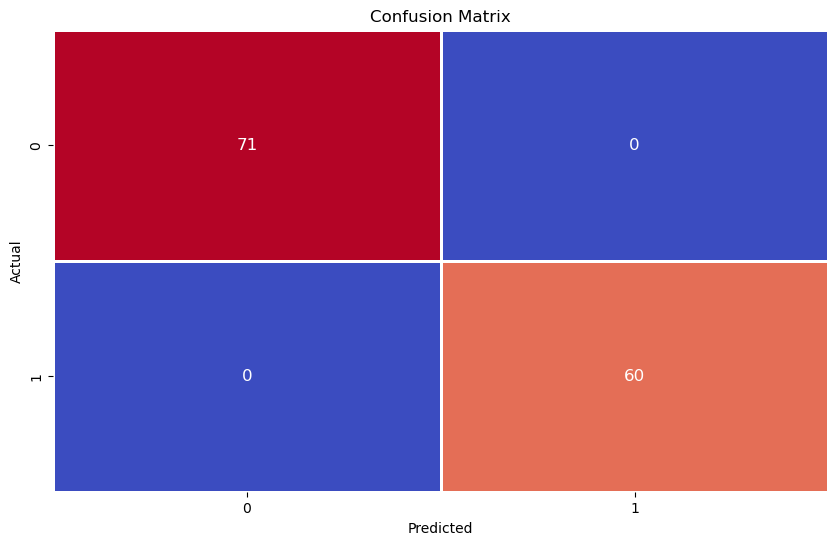

In [20]:
matrix = confusion_matrix(y_test,stacked_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(matrix,annot=True,annot_kws={'size':12},fmt='d',cmap='coolwarm',cbar=False,linewidth=1)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()